In [2]:
import tensorflow as tf 

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
import matplotlib.pyplot as plt 

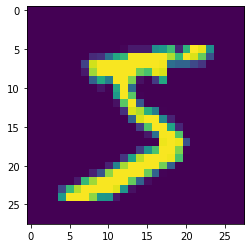

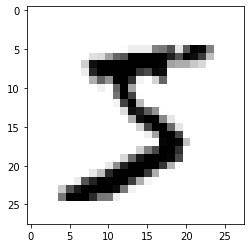

In [6]:
plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0],cmap=plt.cm.binary)

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

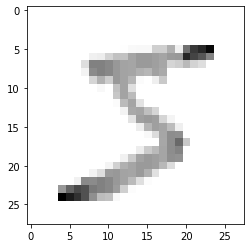

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

print('Training samples dimension:',x_trainr.shape)
print('Testing samples dimension:',x_testr.shape)

In [14]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [15]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

# model.add(Dense(1))
# model.add(Activation("sigmoid"))
# for binary

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)         

In [18]:
print('Total Training Samples:',len(x_trainr))

Total Training Samples: 60000


In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 27s 20ms/step - loss: 0.3369 - accuracy: 0.8936 - val_loss: 0.1333 - val_accuracy: 0.9602
Epoch 2/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.1068 - accuracy: 0.9673 - val_loss: 0.0884 - val_accuracy: 0.9734
Epoch 3/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.0791 - val_accuracy: 0.9753
Epoch 4/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0576 - accuracy: 0.9824 - val_loss: 0.0555 - val_accuracy: 0.9823
Epoch 5/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0711 - val_accuracy: 0.9783


In [22]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0699 - accuracy: 0.9813
0.06992453336715698
0.9812999963760376


In [24]:
predictions = model.predict([x_testr])
print(predictions)

[[1.99108004e-12 1.00243114e-09 4.08766887e-08 ... 9.99998927e-01
  1.13131456e-10 1.64880817e-07]
 [1.09119321e-06 3.77850000e-07 9.99984026e-01 ... 3.77165429e-06
  8.55688029e-07 5.11487777e-08]
 [2.19530438e-08 9.99147177e-01 3.72539461e-07 ... 2.60565048e-05
  2.86873274e-06 1.36758797e-06]
 ...
 [1.56615226e-12 3.56024401e-08 5.44726575e-09 ... 6.37436983e-07
  1.81716384e-08 7.37687344e-07]
 [7.01974784e-07 1.39611517e-10 1.95593053e-08 ... 5.30334554e-10
  4.86957906e-05 1.14095982e-07]
 [4.81226664e-07 1.67162014e-07 2.04910230e-05 ... 6.24115370e-10
  9.09100272e-05 4.09348360e-07]]


In [25]:
print(np.argmax(predictions[0]))

7


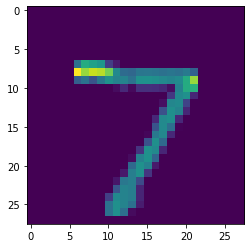

In [26]:
plt.imshow(x_test[0])

2
1
0
4
1


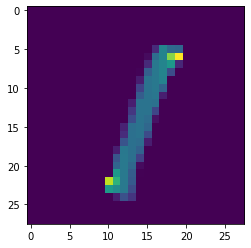

In [27]:
pred = [1,2,3,4,5]

for i in pred:
    print(np.argmax(predictions[i]))
    plt.imshow(x_test[i])

In [28]:
import cv2

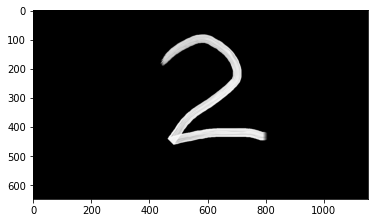

In [49]:
img = cv2.imread('pred_2.png')
plt.imshow(img)

In [50]:
img.shape

(648, 1152, 3)

In [51]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(648, 1152)

In [52]:
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
resized.shape

(28, 28)

In [53]:
newimg = tf.keras.utils.normalize(resized,axis=1)
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)
newimg.shape

(1, 28, 28, 1)

In [54]:
predictions = model.predict(newimg)
print(np.argmax(predictions))

2
